In [57]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
import calendar
import random

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import statistics

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [58]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

Base.classes.keys()

['measurement', 'station']

In [59]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [60]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
print(results)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [61]:
# 3. Convert the June temperatures to a list.
temps_june = list(results)

In [62]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
temps_june_df = pd.DataFrame(results, columns=['date', '    June Temps'])
print(temps_june_df)

            date      June Temps
0     2010-06-01            78.0
1     2010-06-02            76.0
2     2010-06-03            78.0
3     2010-06-04            76.0
4     2010-06-05            77.0
...          ...             ...
1695  2017-06-26            79.0
1696  2017-06-27            74.0
1697  2017-06-28            74.0
1698  2017-06-29            76.0
1699  2017-06-30            75.0

[1700 rows x 2 columns]


In [63]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
temps_june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [64]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
print(results)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [65]:
# 7. Convert the December temperatures to a list.
temps_december = list(results)

In [66]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
temps_december_df = pd.DataFrame(results, columns=['date', 'December Temps'])
print(temps_december_df)

            date  December Temps
0     2010-12-01            76.0
1     2010-12-03            74.0
2     2010-12-04            74.0
3     2010-12-06            64.0
4     2010-12-07            64.0
...          ...             ...
1512  2016-12-27            71.0
1513  2016-12-28            71.0
1514  2016-12-29            69.0
1515  2016-12-30            65.0
1516  2016-12-31            65.0

[1517 rows x 2 columns]


In [67]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
temps_december_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [68]:
# Sorting the dataframes by date
temps_june_df = temps_june_df.sort_index()
temps_december_df = temps_december_df.sort_index()
print(temps_june_df.to_string(index=False))
print(temps_december_df.to_string(index=False))

       date      June Temps
 2010-06-01            78.0
 2010-06-02            76.0
 2010-06-03            78.0
 2010-06-04            76.0
 2010-06-05            77.0
 2010-06-06            78.0
 2010-06-07            77.0
 2010-06-08            78.0
 2010-06-09            78.0
 2010-06-10            79.0
 2010-06-11            78.0
 2010-06-12            78.0
 2010-06-13            78.0
 2010-06-14            77.0
 2010-06-15            78.0
 2010-06-16            78.0
 2010-06-17            77.0
 2010-06-18            77.0
 2010-06-19            82.0
 2010-06-20            78.0
 2010-06-21            78.0
 2010-06-22            78.0
 2010-06-23            78.0
 2010-06-24            78.0
 2010-06-25            77.0
 2010-06-26            76.0
 2010-06-27            78.0
 2010-06-28            78.0
 2010-06-29            78.0
 2010-06-30            78.0
 2011-06-01            77.0
 2011-06-02            78.0
 2011-06-03            73.0
 2011-06-04            70.0
 2011-06-05         

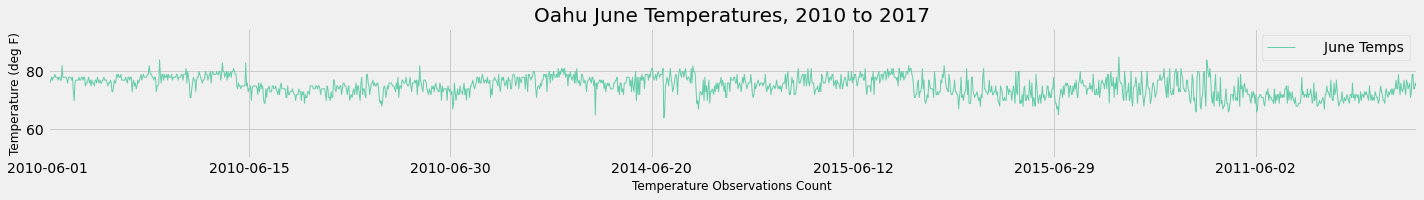

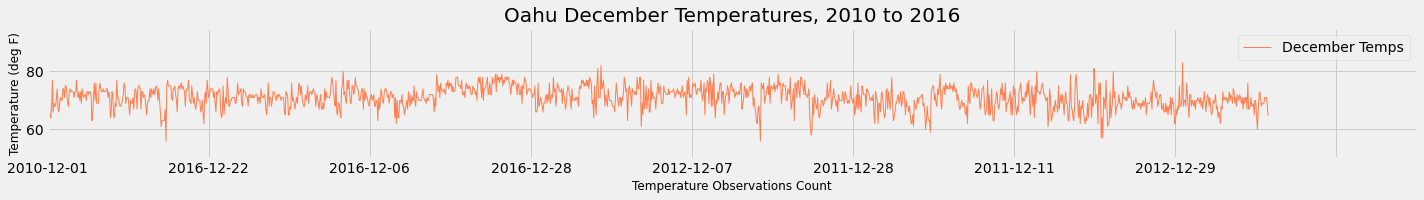

In [69]:
# Pandas Plotting with Matplotlib to plot the data
temps_june_df.plot(x="date", figsize=(20, 3), c="mediumaquamarine", linewidth=1)

#plt.errorbar("tobs", yerr=stdev, capsize=3)
plt.xlabel("Temperature Observations Count", fontsize=12)
plt.ylabel("Temperature (deg F)", fontsize=12)
plt.ylim(50, 95)
plt.xlim(0, 1700)
plt.title("Oahu June Temperatures, 2010 to 2017", fontsize=20)
plt.tight_layout()
#plt.legend()

temps_december_df.plot(x="date", figsize=(20, 3), c="coral", label='abc', linewidth=1)
plt.xlabel("Temperature Observations Count", fontsize=12)
plt.ylabel("Temperature (deg F)", fontsize=12)
plt.ylim(50, 95)
plt.xlim(0, 1700)
plt.title("Oahu December Temperatures, 2010 to 2016", fontsize=20)

plt.grid(True)
plt.tight_layout()

#plt.savefig("analysis/Fig1.png")

In [70]:
temps_december_df.count()

date              1517
December Temps    1517
dtype: int64

In [71]:
temps_june_df.count()

date              1700
    June Temps    1700
dtype: int64

In [72]:
# *** PRECIPITATION *** 

In [73]:
# JUNE. Write a query that filters the Measurement table to retrieve the precipitation for the month of June. 
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
print(results)

[('2010-06-01', 0.0), ('2010-06-02', 0.01), ('2010-06-03', 0.0), ('2010-06-04', 0.0), ('2010-06-05', 0.0), ('2010-06-06', 0.0), ('2010-06-07', 0.0), ('2010-06-08', 0.0), ('2010-06-09', 0.0), ('2010-06-10', 0.0), ('2010-06-11', 0.0), ('2010-06-12', 0.0), ('2010-06-13', 0.0), ('2010-06-14', 0.0), ('2010-06-15', 0.0), ('2010-06-16', 0.0), ('2010-06-17', 0.0), ('2010-06-18', 0.0), ('2010-06-19', 0.0), ('2010-06-20', 0.0), ('2010-06-21', 0.0), ('2010-06-22', 0.0), ('2010-06-23', 0.0), ('2010-06-24', 0.0), ('2010-06-25', 0.0), ('2010-06-26', 0.02), ('2010-06-27', 0.0), ('2010-06-28', 0.0), ('2010-06-29', 0.0), ('2010-06-30', 0.0), ('2011-06-01', 0.07), ('2011-06-02', 0.0), ('2011-06-03', 0.56), ('2011-06-04', 0.89), ('2011-06-05', 0.0), ('2011-06-06', 0.0), ('2011-06-07', 0.0), ('2011-06-08', 0.03), ('2011-06-09', 0.01), ('2011-06-10', 0.0), ('2011-06-11', 0.0), ('2011-06-12', 0.0), ('2011-06-13', 0.0), ('2011-06-14', 0.0), ('2011-06-15', 0.0), ('2011-06-17', 0.0), ('2011-06-18', 0.0), ('201

In [74]:
# 3b. Convert the June precips to a list.
precips_june = list(results)

In [75]:
# 4b. Create a DataFrame from the list of precips for the month of June. 
precips_june_df = pd.DataFrame(results, columns=['date', '    June Precipitation'])
print(precips_june_df)

            date      June Precipitation
0     2010-06-01                    0.00
1     2010-06-02                    0.01
2     2010-06-03                    0.00
3     2010-06-04                    0.00
4     2010-06-05                    0.00
...          ...                     ...
1695  2017-06-26                    0.02
1696  2017-06-27                    0.10
1697  2017-06-28                    0.02
1698  2017-06-29                    0.04
1699  2017-06-30                    0.20

[1700 rows x 2 columns]


In [76]:
# 5b. Calculate and print out the summary statistics for the June precips DataFrame.
precips_june_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [77]:
# DECEMBER. Write a query that filters the Measurement table to retrieve the precipitation for the month of December. 
results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
print(results)

[('2010-12-01', 0.04), ('2010-12-03', 0.0), ('2010-12-04', 0.0), ('2010-12-06', 0.0), ('2010-12-07', 0.0), ('2010-12-08', 0.0), ('2010-12-09', 0.0), ('2010-12-10', 1.58), ('2010-12-11', 0.77), ('2010-12-12', 0.0), ('2010-12-13', 0.0), ('2010-12-14', 0.0), ('2010-12-15', 0.0), ('2010-12-16', 0.0), ('2010-12-17', 0.0), ('2010-12-18', 0.0), ('2010-12-19', 1.4), ('2010-12-23', 0.0), ('2010-12-24', 0.0), ('2010-12-26', None), ('2010-12-27', 0.13), ('2010-12-28', 0.55), ('2010-12-29', 0.06), ('2010-12-30', 0.01), ('2010-12-31', 0.0), ('2011-12-01', 0.03), ('2011-12-02', 0.08), ('2011-12-03', 0.0), ('2011-12-04', 0.0), ('2011-12-05', 0.0), ('2011-12-06', 0.0), ('2011-12-07', 0.0), ('2011-12-08', 0.0), ('2011-12-09', 0.13), ('2011-12-10', 0.07), ('2011-12-11', 0.07), ('2011-12-12', 0.08), ('2011-12-13', 0.4), ('2011-12-14', 0.7), ('2011-12-15', 0.0), ('2011-12-16', 0.01), ('2011-12-17', 0.07), ('2011-12-18', 0.02), ('2011-12-19', 0.15), ('2011-12-20', 0.02), ('2011-12-21', 0.18), ('2011-12-22'

In [78]:
# 7b. Convert the December precips to a list.
precips_dec = list(results)

In [83]:
# 8b. Create a DataFrame from the list of precips for the month of December. 
precips_dec_df = pd.DataFrame(results, columns=['date', 'December Precipitation'])
print(precips_dec_df)

            date  December Precipitation
0     2010-12-01                    0.04
1     2010-12-03                    0.00
2     2010-12-04                    0.00
3     2010-12-06                    0.00
4     2010-12-07                    0.00
...          ...                     ...
1512  2016-12-27                    0.14
1513  2016-12-28                    0.14
1514  2016-12-29                    1.03
1515  2016-12-30                    2.37
1516  2016-12-31                    0.90

[1517 rows x 2 columns]


In [84]:
# 9b. Calculate and print out the summary statistics for the December precips DataFrame.
precips_dec_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [85]:
precips_dec_df.sum()

date                      2010-12-012010-12-032010-12-042010-12-062010-1...
December Precipitation                                               304.63
dtype: object

In [86]:
precips_june_df.sum()

date                      2010-06-012010-06-022010-06-032010-06-042010-0...
    June Precipitation                                               214.63
dtype: object

In [87]:
# Sorting the dataframes by date
precips_june_df = precips_june_df.sort_index()
precips_dec_df = precips_dec_df.sort_index()
print(precips_june_df.to_string(index=False))
print(precips_dec_df.to_string(index=False))

       date      June Precipitation
 2010-06-01                    0.00
 2010-06-02                    0.01
 2010-06-03                    0.00
 2010-06-04                    0.00
 2010-06-05                    0.00
 2010-06-06                    0.00
 2010-06-07                    0.00
 2010-06-08                    0.00
 2010-06-09                    0.00
 2010-06-10                    0.00
 2010-06-11                    0.00
 2010-06-12                    0.00
 2010-06-13                    0.00
 2010-06-14                    0.00
 2010-06-15                    0.00
 2010-06-16                    0.00
 2010-06-17                    0.00
 2010-06-18                    0.00
 2010-06-19                    0.00
 2010-06-20                    0.00
 2010-06-21                    0.00
 2010-06-22                    0.00
 2010-06-23                    0.00
 2010-06-24                    0.00
 2010-06-25                    0.00
 2010-06-26                    0.02
 2010-06-27                 

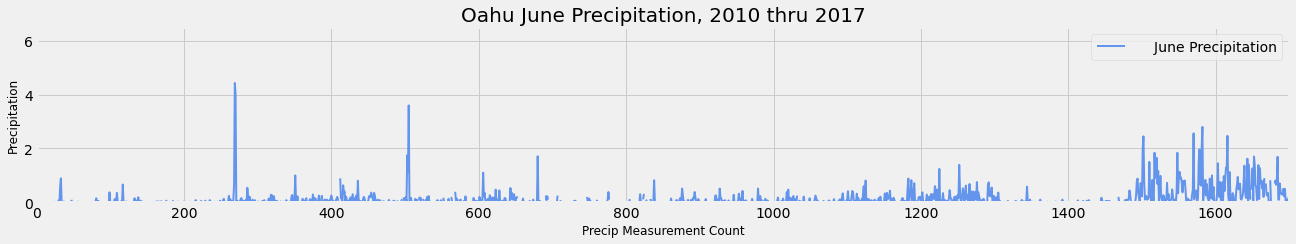

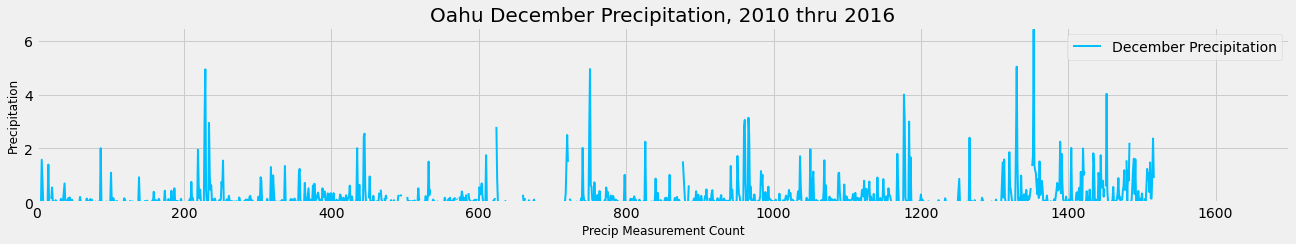

In [100]:
# Pandas Plotting with Matplotlib 
precips_june_df.plot(figsize=(20, 3), c="cornflowerblue", linewidth=2)

plt.xlabel("Precip Measurement Count", fontsize=12)
plt.ylabel("Precipitation", fontsize=12)
plt.ylim(0, 6.5)
plt.xlim(0, 1700)
plt.title("Oahu June Precipitation, 2010 thru 2017", fontsize=20)
#plt.tight_layout()
#plt.legend()

precips_dec_df.plot(figsize=(20, 3), c="deepskyblue", label='abc', linewidth=2)
plt.xlabel("Precip Measurement Count", fontsize=12)
plt.ylabel("Precipitation", fontsize=12)
plt.ylim(0, 6.5)
plt.xlim(0, 1700)
plt.title("Oahu December Precipitation, 2010 thru 2016", fontsize=20)

plt.grid(True)
#plt.tight_layout()

In [97]:
# June
session.query(func.min(Measurement.prcp), func.max(Measurement.prcp), func.avg(Measurement.prcp), func.sum(Measurement.prcp)).\
filter(Measurement.station == 'USC00519281').filter(extract('month', Measurement.date)==6).all()

[(0.0, 1.39, 0.15152542372881356, 35.76)]

In [98]:
# December
session.query(func.min(Measurement.prcp), func.max(Measurement.prcp), func.avg(Measurement.prcp), func.sum(Measurement.prcp)).\
filter(Measurement.station == 'USC00519281').filter(extract('month', Measurement.date)==12).all()

[(0.0, 3.14, 0.2449308755760371, 53.15000000000005)]

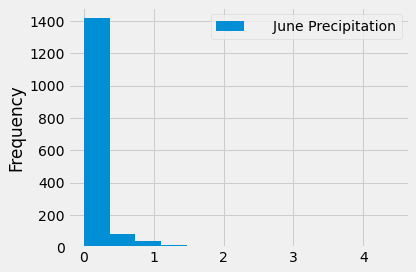

In [99]:
# plot histogram
precips_june_df.plot.hist(bins=12)
plt.tight_layout()